In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= r"/content/drive/MyDrive/cat_dog_sub/cat_dog_sub/test"        # path need to be changed, before use
ds= image_dataset_from_directory(path, validation_split=0.2, subset="training", image_size=(256,256),
                                 interpolation="bilinear", crop_to_aspect_ratio=True, seed=42,
                                 shuffle=True, batch_size=10)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


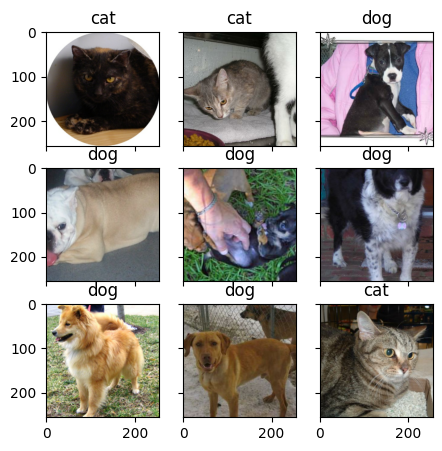

In [ ]:
# taking one image form the dataset and displaying the image
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5, 5))

for images, labels in ds.take(1):
    for i in range(3):
        for j in range(3):
            # Access the image and label for the current subplot
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(ds.class_names[labels[i*3+j]])

plt.show()

In [ ]:
out_height, out_width = 128, 256
resize = tf.keras.layers.Resizing(out_height, out_width)
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)

flip =  tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotate =  tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)


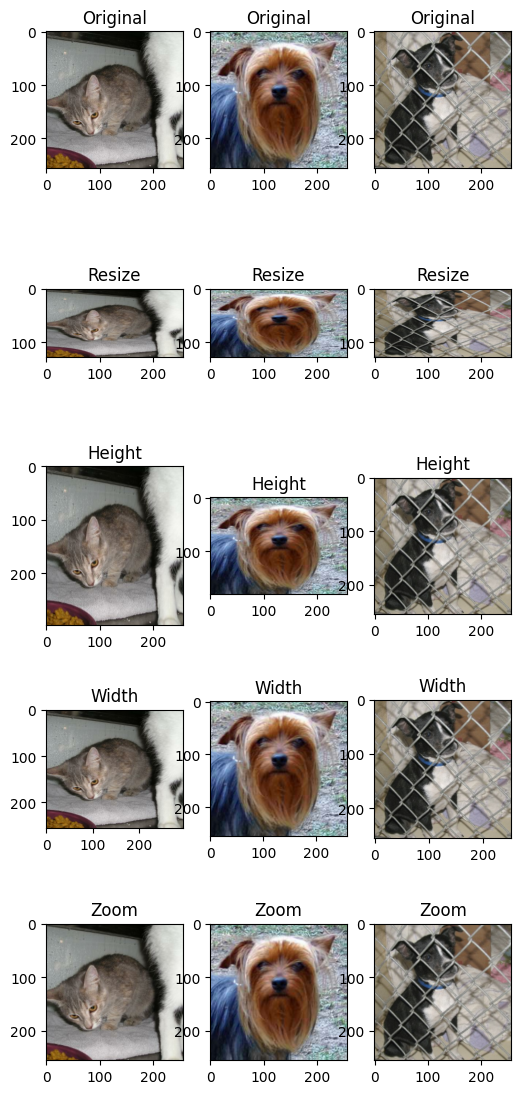

In [ ]:
#Visualize images and arguments
fig, ax = plt.subplots(5, 3,figsize=(6, 14))
for images, labels in ds.take(1):
  for i in range(3):
    # Display original image
    ax[0][i].imshow(images[i].numpy().astype("uint8"))
    ax[0][i].set_title("Original")

    # Apply resize and display
    resized_image = resize(images[i])
    ax[1][i].imshow(resized_image.numpy().astype("uint8"))
    ax[1][i].set_title("Resize")

    # Apply Height and display
    height_image = height(images[i])
    ax[2][i].imshow(height_image.numpy().astype("uint8"))
    ax[2][i].set_title("Height")

    # Apply Width and display
    width_image = width(images[i])
    ax[3][i].imshow(width_image.numpy().astype("uint8"))
    ax[3][i].set_title("Width")

    # Apply Zoom and display
    zoom_image = zoom(images[i])
    ax[4][i].imshow(zoom_image.numpy().astype("uint8"))
    ax[4][i].set_title("Zoom")

plt.show()

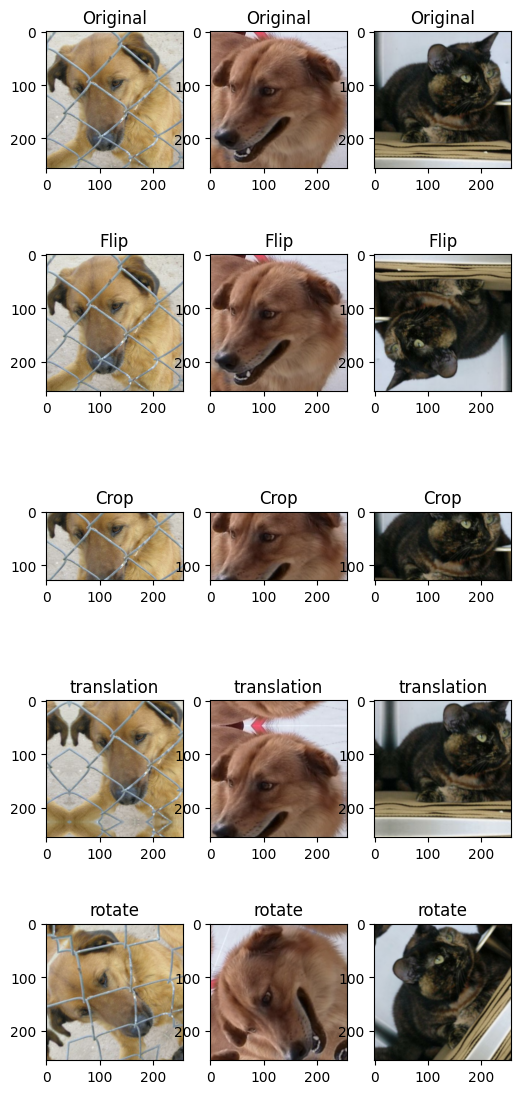